In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Importing files from google drive
%cd /content/drive/MyDrive/fda_project

/content/drive/MyDrive/fda_project


In [5]:
import pandas as pd
import glob
import os


file_path = '/content/drive/MyDrive/fda_project/DEMOGRAPHIC_DATA/DEMO_DATA.csv'
df_demo = pd.read_csv(file_path, sep='\t', usecols=lambda col: col != 'Unnamed: 0')


file_folder = '/content/drive/MyDrive/fda_project/PHYSIO_DATA'
all_files = glob.glob(os.path.join(file_folder, "*.csv"))

mergephysiodf = pd.read_csv(all_files[0], sep='\t', usecols=lambda col: col != 'Unnamed: 0')

for file in all_files[1:]:
    df = pd.read_csv(file, sep='\t', usecols=lambda col: col != 'Unnamed: 0')
    mergephysiodf = pd.merge(mergephysiodf, df, on='hadm_id', how='inner')



file_folder = '/content/drive/MyDrive/fda_project/LAB_DATA'
all_files = glob.glob(os.path.join(file_folder, "*.csv"))

mergelabdf = pd.read_csv(all_files[0], sep='\t', usecols=lambda col: col != 'Unnamed: 0')

for file in all_files[1:]:
    df = pd.read_csv(file, sep='\t', usecols=lambda col: col != 'Unnamed: 0')
    mergelabdf = pd.merge(mergelabdf, df, on='hadm_id', how='inner')

In [6]:
print(df_demo.head())
print (df_demo.shape)

   hadm_id        age gender marital_status   religion ethnicity
0   165315  64.971282      F        MARRIED       NONE     WHITE
1   152223  71.178910      M        MARRIED  CHRISTIAN     WHITE
2   124321  75.306343      M        MARRIED  CHRISTIAN     WHITE
3   161859  39.042949      M         SINGLE  CHRISTIAN     WHITE
4   129635  58.989281      M        MARRIED       NONE     WHITE
(58976, 6)


In [7]:
display(mergephysiodf.head())
mergephysiodf.shape

,hadm_id,avg_hr,std_hr,avg_temp,std_temp,avg_sys_press,std_sys_press,avg_resp_rate,std_resp_rate,avg_dias_press,std_dias_press,avg_spo2,std_spo2,avg_art_ph,std_art_ph,avg_cvp,std_cvp
0,100001,111.313953,12.399489,NaN,NaN,174.191781,21.503654,17.357143,2.560263,92.780822,10.397979,97.604167,0.961815,NaN,NaN,NaN,NaN
1,100003,81.218182,8.343751,NaN,NaN,116.519231,17.056412,15.818182,2.815900,60.615385,12.249296,98.229167,2.746290,NaN,NaN,10.500000,2.368778
2,100006,108.630252,9.944648,NaN,NaN,140.509434,12.972678,18.647059,3.330873,82.169811,12.498740,97.861789,2.564976,7.38,0.036515,NaN,NaN
3,100007,79.444444,11.623253,NaN,NaN,140.746835,12.303292,19.185185,4.461253,67.164557,11.336836,97.960526,2.187484,NaN,NaN,7.125000,3.190207
4,100009,68.968750,12.208465,NaN,NaN,110.543860,12.652033,23.515625,6.409299,51.175439,6.118248,96.174603,2.028345,NaN,NaN,9.526316,5.956961


(57792, 17)

In [8]:
display(mergelabdf.head())
mergelabdf.shape

,hadm_id,avg_blood_glucose,std_blood_glucose,avg_bicarbonate,std_bicarbonate,avg_blood_urea_nitrogen,std_blood_urea_nitrogen,avg_sodium,std_sodium,avg_potasssium,...,avg_white_blood_cells,std_white_blood_cells,avg_creatinine,std_creatinine,avg_albumin,std_albumin,avg_hematrocrit,std_hematrocrit,avg_platelet_count,std_platelet_count
0,100003.0,96.833333,26.798632,19.666667,3.983298,34.500000,16.071714,132.000000,1.264911,4.783333,...,13.328571,2.566265,1.083333,0.147196,2.40,0.173205,27.781818,2.644927,145.285714,27.219566
1,100006.0,105.000000,33.578267,29.384615,3.990373,17.076923,3.226493,131.384615,1.980676,4.076923,...,9.700000,2.840188,0.638462,0.076795,2.00,NaN,31.853846,2.733318,228.615385,35.998932
2,100009.0,152.235294,42.697379,25.200000,1.923538,17.000000,3.633180,137.714286,3.039424,4.242857,...,12.385714,2.927131,0.783333,0.040825,4.30,NaN,35.914286,3.575112,142.571429,28.814679
3,100011.0,132.458333,19.834049,27.187500,2.286737,11.764706,2.107410,138.037037,1.911131,4.084615,...,11.829412,3.451044,0.817647,0.272110,2.45,0.070711,27.562963,5.553665,518.058824,419.045115
4,100012.0,111.166667,14.288004,26.555556,3.778595,12.909091,1.868397,132.928571,2.164905,4.185714,...,8.930769,2.450301,0.845455,0.129334,3.85,0.353553,28.486667,4.719695,198.384615,65.723586


(30816, 21)

In [9]:
import pandas as pd
merge_df = pd.merge(mergelabdf, mergephysiodf, on='hadm_id', how='inner')
display(merge_df.head())
merge_df.shape

,hadm_id,avg_blood_glucose,std_blood_glucose,avg_bicarbonate,std_bicarbonate,avg_blood_urea_nitrogen,std_blood_urea_nitrogen,avg_sodium,std_sodium,avg_potasssium,...,avg_resp_rate,std_resp_rate,avg_dias_press,std_dias_press,avg_spo2,std_spo2,avg_art_ph,std_art_ph,avg_cvp,std_cvp
0,100003.0,96.833333,26.798632,19.666667,3.983298,34.500000,16.071714,132.000000,1.264911,4.783333,...,15.818182,2.815900,60.615385,12.249296,98.229167,2.746290,NaN,NaN,10.500000,2.368778
1,100006.0,105.000000,33.578267,29.384615,3.990373,17.076923,3.226493,131.384615,1.980676,4.076923,...,18.647059,3.330873,82.169811,12.498740,97.861789,2.564976,7.38,0.036515,NaN,NaN
2,100009.0,152.235294,42.697379,25.200000,1.923538,17.000000,3.633180,137.714286,3.039424,4.242857,...,23.515625,6.409299,51.175439,6.118248,96.174603,2.028345,NaN,NaN,9.526316,5.956961
3,100011.0,132.458333,19.834049,27.187500,2.286737,11.764706,2.107410,138.037037,1.911131,4.084615,...,21.256849,6.281412,69.479866,12.061344,99.094915,1.978922,NaN,NaN,NaN,NaN
4,100012.0,111.166667,14.288004,26.555556,3.778595,12.909091,1.868397,132.928571,2.164905,4.185714,...,14.426966,3.893140,56.357895,9.841203,98.096774,3.297115,NaN,NaN,10.111111,4.850789


(30600, 37)

In [10]:
import pandas as pd
df_last = pd.merge(df_demo, merge_df, on='hadm_id', how='inner')
display(df_last.head())
df_last.shape

,hadm_id,age,gender,marital_status,religion,ethnicity,avg_blood_glucose,std_blood_glucose,avg_bicarbonate,std_bicarbonate,...,avg_resp_rate,std_resp_rate,avg_dias_press,std_dias_press,avg_spo2,std_spo2,avg_art_ph,std_art_ph,avg_cvp,std_cvp
0,124321,75.306343,M,MARRIED,CHRISTIAN,WHITE,134.600000,15.833860,27.250000,1.669046,...,17.114286,2.741526,64.860000,15.398131,98.114286,1.529541,NaN,NaN,NaN,NaN
1,129635,58.989281,M,MARRIED,NONE,WHITE,209.555556,104.623266,24.333333,2.500000,...,17.965116,4.564435,50.571429,10.242767,96.373494,2.341101,7.334286,0.038668,11.162162,2.661594
2,104557,91.400000,M,MARRIED,CHRISTIAN,NONE,148.571429,39.432885,19.428571,1.133893,...,20.531250,3.026596,47.900000,9.026207,93.781250,2.406099,NaN,NaN,NaN,NaN
3,128652,72.315006,M,MARRIED,CHRISTIAN,WHITE,128.214286,22.000624,25.083333,2.609714,...,11.322404,2.238497,54.276042,7.031853,97.798995,1.726150,7.412500,0.044944,14.012987,4.219296
4,176176,82.449144,M,MARRIED,CHRISTIAN,NONE,121.000000,19.646883,27.400000,1.516575,...,16.756757,3.192051,49.027027,6.084984,95.459459,1.608909,NaN,NaN,6.777778,1.675216


(30600, 42)

In [11]:
# prompt: download df_last

from google.colab import files
df_last.to_csv('df_last.csv')
files.download('df_last.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
df_last.columns


Index(['hadm_id', 'age', 'gender', 'marital_status', 'religion', 'ethnicity',
       'avg_blood_glucose', 'std_blood_glucose', 'avg_bicarbonate',
       'std_bicarbonate', 'avg_blood_urea_nitrogen', 'std_blood_urea_nitrogen',
       'avg_sodium', 'std_sodium', 'avg_potasssium', 'std_potasssium',
       'avg_white_blood_cells', 'std_white_blood_cells', 'avg_creatinine',
       'std_creatinine', 'avg_albumin', 'std_albumin', 'avg_hematrocrit',
       'std_hematrocrit', 'avg_platelet_count', 'std_platelet_count', 'avg_hr',
       'std_hr', 'avg_temp', 'std_temp', 'avg_sys_press', 'std_sys_press',
       'avg_resp_rate', 'std_resp_rate', 'avg_dias_press', 'std_dias_press',
       'avg_spo2', 'std_spo2', 'avg_art_ph', 'std_art_ph', 'avg_cvp',
       'std_cvp'],
      dtype='object')

In [13]:
#  removing  the  columns  which are not needed

cols_to_remove = ['avg_cvp', 'std_cvp', 'avg_art_ph', 'std_art_ph']
df_last = df_last.drop(columns=cols_to_remove, errors='ignore')
display(df_last.head())
display(df_last.shape)

,hadm_id,age,gender,marital_status,religion,ethnicity,avg_blood_glucose,std_blood_glucose,avg_bicarbonate,std_bicarbonate,...,avg_temp,std_temp,avg_sys_press,std_sys_press,avg_resp_rate,std_resp_rate,avg_dias_press,std_dias_press,avg_spo2,std_spo2
0,124321,75.306343,M,MARRIED,CHRISTIAN,WHITE,134.600000,15.833860,27.250000,1.669046,...,NaN,NaN,122.180000,22.562105,17.114286,2.741526,64.860000,15.398131,98.114286,1.529541
1,129635,58.989281,M,MARRIED,NONE,WHITE,209.555556,104.623266,24.333333,2.500000,...,NaN,NaN,115.065934,24.737647,17.965116,4.564435,50.571429,10.242767,96.373494,2.341101
2,104557,91.400000,M,MARRIED,CHRISTIAN,NONE,148.571429,39.432885,19.428571,1.133893,...,NaN,NaN,108.800000,11.481319,20.531250,3.026596,47.900000,9.026207,93.781250,2.406099
3,128652,72.315006,M,MARRIED,CHRISTIAN,WHITE,128.214286,22.000624,25.083333,2.609714,...,NaN,NaN,102.151042,13.371968,11.322404,2.238497,54.276042,7.031853,97.798995,1.726150
4,176176,82.449144,M,MARRIED,CHRISTIAN,NONE,121.000000,19.646883,27.400000,1.516575,...,NaN,NaN,115.000000,7.820912,16.756757,3.192051,49.027027,6.084984,95.459459,1.608909


(30600, 38)

In [14]:
if df_last is not None:
  # Check for missing values in each column
  missingvalues = df_last.isnull().sum()
  print("Missing values per column:\n", missingvalues)

  # Calculate the percentage of missing values in each column
  missingpercentage = (df_last.isnull().sum() / len(df_last)) * 100
  print("\nPercentage of missing values per column:\n", missingpercentage)

Missing values per column:
 hadm_id                        0
age                            0
gender                         0
marital_status                 0
religion                       0
ethnicity                      0
avg_blood_glucose              0
std_blood_glucose            179
avg_bicarbonate                1
std_bicarbonate              220
avg_blood_urea_nitrogen        0
std_blood_urea_nitrogen      178
avg_sodium                     0
std_sodium                   212
avg_potasssium                 0
std_potasssium               210
avg_white_blood_cells          0
std_white_blood_cells        195
avg_creatinine                 0
std_creatinine               181
avg_albumin                    4
std_albumin                14475
avg_hematrocrit                0
std_hematrocrit              168
avg_platelet_count             0
std_platelet_count           198
avg_hr                       274
std_hr                       277
avg_temp                   26726
std_temp       

In [15]:
if df_last is not None:
  # Check for missing values in each column
  missingvalues = df_last.isnull().sum()
  print("Missing values per column:\n", missingvalues)

  # Calculate the percentage of missing values in each column
  missingpercentage = (df_last.isnull().sum() / len(df_last)) * 100
  print("\nPercentage of missing values per column:\n", missingpercentage)

Missing values per column:
 hadm_id                        0
age                            0
gender                         0
marital_status                 0
religion                       0
ethnicity                      0
avg_blood_glucose              0
std_blood_glucose            179
avg_bicarbonate                1
std_bicarbonate              220
avg_blood_urea_nitrogen        0
std_blood_urea_nitrogen      178
avg_sodium                     0
std_sodium                   212
avg_potasssium                 0
std_potasssium               210
avg_white_blood_cells          0
std_white_blood_cells        195
avg_creatinine                 0
std_creatinine               181
avg_albumin                    4
std_albumin                14475
avg_hematrocrit                0
std_hematrocrit              168
avg_platelet_count             0
std_platelet_count           198
avg_hr                       274
std_hr                       277
avg_temp                   26726
std_temp       

In [16]:
complete_the_columns = ['std_potasssium', 'std_blood_urea_nitrogen', 'std_sodium',
                   'std_hematrocrit', 'std_platelet_count', 'std_creatinine',
                   'std_blood_glucose', 'avg_albumin', 'std_bicarbonate',
                   'avg_bicarbonate','std_white_blood_cells', 'avg_hr', 'std_hr', 'avg_spo2',
                   'std_spo2', 'avg_dias_press', 'std_dias_press',
                   'avg_resp_rate', 'std_resp_rate', 'avg_sys_press',
                   'std_sys_press']

# Fill missing values  with the mean of each column
for column in complete_the_columns:
  if column in df_last.columns:
    mean_val = df_last[column].mean()
    df_last[column].fillna(mean_val, inplace=True)

  # Verifying the missign values aftwe imputing
missingvaluesafter = df_last.isnull().sum()
print("\nMissing values after filling:\n", missingvaluesafter)

df_last.shape


Missing values after filling:
 hadm_id                        0
age                            0
gender                         0
marital_status                 0
religion                       0
ethnicity                      0
avg_blood_glucose              0
std_blood_glucose              0
avg_bicarbonate                0
std_bicarbonate                0
avg_blood_urea_nitrogen        0
std_blood_urea_nitrogen        0
avg_sodium                     0
std_sodium                     0
avg_potasssium                 0
std_potasssium                 0
avg_white_blood_cells          0
std_white_blood_cells          0
avg_creatinine                 0
std_creatinine                 0
avg_albumin                    0
std_albumin                14475
avg_hematrocrit                0
std_hematrocrit                0
avg_platelet_count             0
std_platelet_count             0
avg_hr                         0
std_hr                         0
avg_temp                   26726
std_temp   

<ipython-input-16-b5fa8f9a03d3>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_last[column].fillna(mean_val, inplace=True)


(30600, 38)

In [17]:
columns_to_remove = ['avg_temp', 'std_temp', 'std_albumin']
df_last = df_last.drop(columns=columns_to_remove, errors='ignore')
# Verifying the missign values aftwe imputing
missingvaluesafter = df_last.isnull().sum()
print("\nMissing values after filling:\n", missingvaluesafter)
display(df_last.shape)


Missing values after filling:
 hadm_id                    0
age                        0
gender                     0
marital_status             0
religion                   0
ethnicity                  0
avg_blood_glucose          0
std_blood_glucose          0
avg_bicarbonate            0
std_bicarbonate            0
avg_blood_urea_nitrogen    0
std_blood_urea_nitrogen    0
avg_sodium                 0
std_sodium                 0
avg_potasssium             0
std_potasssium             0
avg_white_blood_cells      0
std_white_blood_cells      0
avg_creatinine             0
std_creatinine             0
avg_albumin                0
avg_hematrocrit            0
std_hematrocrit            0
avg_platelet_count         0
std_platelet_count         0
avg_hr                     0
std_hr                     0
avg_sys_press              0
std_sys_press              0
avg_resp_rate              0
std_resp_rate              0
avg_dias_press             0
std_dias_press             0
avg_spo2   

(30600, 35)

In [18]:
df_last

,hadm_id,age,gender,marital_status,religion,ethnicity,avg_blood_glucose,std_blood_glucose,avg_bicarbonate,std_bicarbonate,...,avg_hr,std_hr,avg_sys_press,std_sys_press,avg_resp_rate,std_resp_rate,avg_dias_press,std_dias_press,avg_spo2,std_spo2
0,124321,75.306343,M,MARRIED,CHRISTIAN,WHITE,134.600000,15.833860,27.250000,1.669046,...,76.694444,9.183275,122.180000,22.562105,17.114286,2.741526,64.860000,15.398131,98.114286,1.529541
1,129635,58.989281,M,MARRIED,NONE,WHITE,209.555556,104.623266,24.333333,2.500000,...,76.321839,9.592262,115.065934,24.737647,17.965116,4.564435,50.571429,10.242767,96.373494,2.341101
2,104557,91.400000,M,MARRIED,CHRISTIAN,NONE,148.571429,39.432885,19.428571,1.133893,...,78.090909,8.125437,108.800000,11.481319,20.531250,3.026596,47.900000,9.026207,93.781250,2.406099
3,128652,72.315006,M,MARRIED,CHRISTIAN,WHITE,128.214286,22.000624,25.083333,2.609714,...,54.814208,8.096154,102.151042,13.371968,11.322404,2.238497,54.276042,7.031853,97.798995,1.726150
4,176176,82.449144,M,MARRIED,CHRISTIAN,NONE,121.000000,19.646883,27.400000,1.516575,...,64.324324,7.659613,115.000000,7.820912,16.756757,3.192051,49.027027,6.084984,95.459459,1.608909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30595,127022,85.198373,F,WIDOWED,JEWISH/HEBREW,WHITE,101.000000,40.574644,26.500000,2.121320,...,94.195652,30.584397,124.382353,19.132734,30.444444,4.845596,58.176471,19.041375,89.857143,2.115701
30596,141860,80.391587,F,WIDOWED,CHRISTIAN,WHITE,115.000000,28.540420,23.600000,4.532423,...,92.580645,12.142240,132.550265,19.213910,15.365591,4.442510,53.539683,15.148722,97.322581,2.030371
30597,105447,88.051610,M,WIDOWED,CHRISTIAN,WHITE,139.666667,36.170891,27.000000,2.828427,...,78.592593,10.930759,122.960000,23.576966,22.222222,5.740097,59.440000,16.951106,97.481481,8.372898
30598,122631,42.559732,M,MARRIED,NONE,WHITE,121.500000,11.351526,26.666667,2.943920,...,113.979167,6.883497,146.500000,16.244622,24.375000,6.058667,83.420000,9.028504,94.000000,2.259731


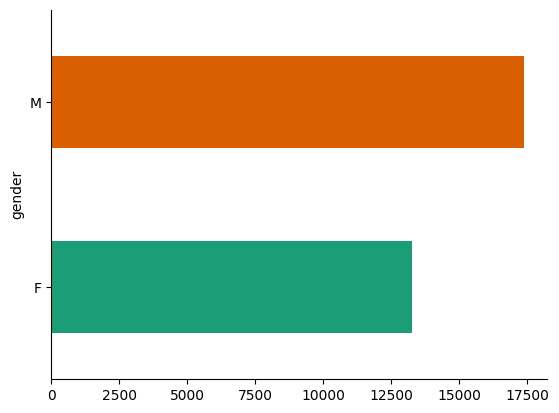

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns
df_last.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

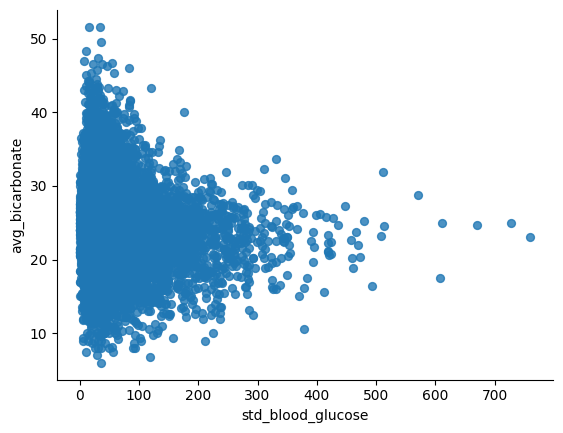

In [20]:
from matplotlib import pyplot as plt
df_last.plot(kind='scatter', x='std_blood_glucose', y='avg_bicarbonate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

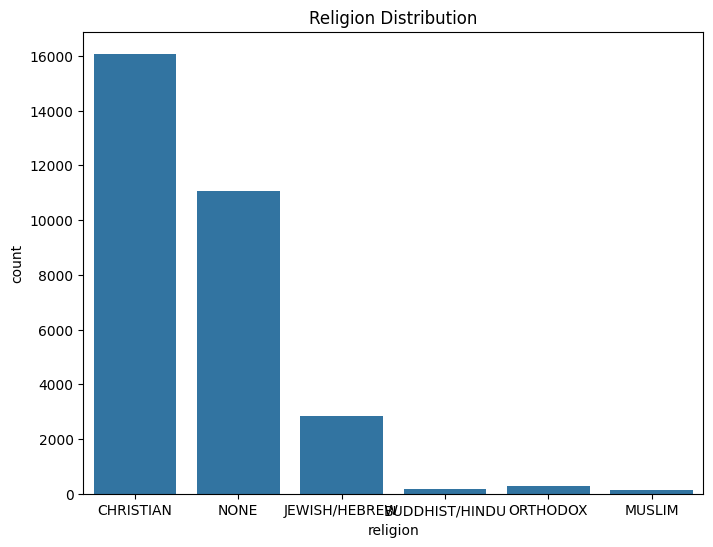

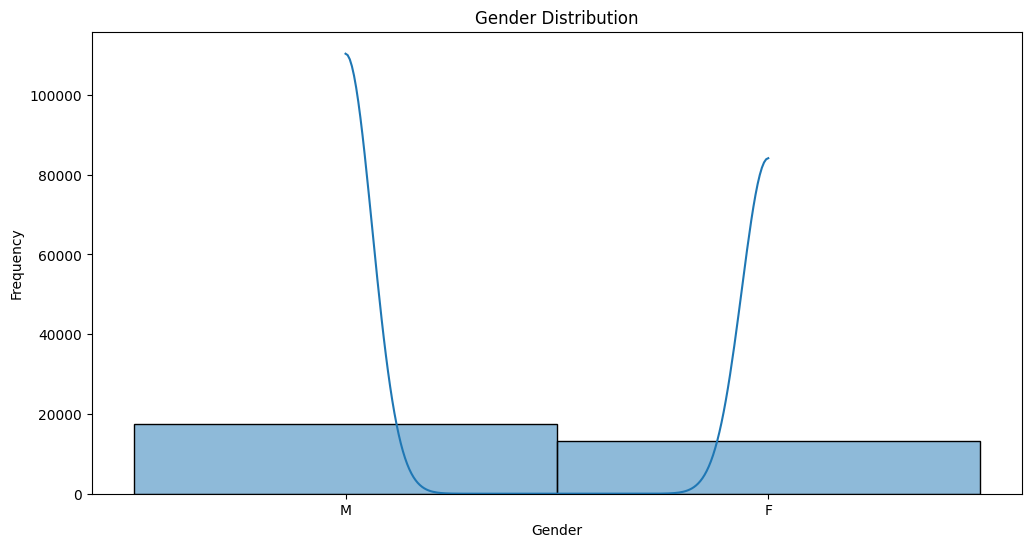

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='religion', data=df_last)
plt.title('Religion Distribution')
plt.show()

# Age Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_last['gender'], bins=20, kde=True)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

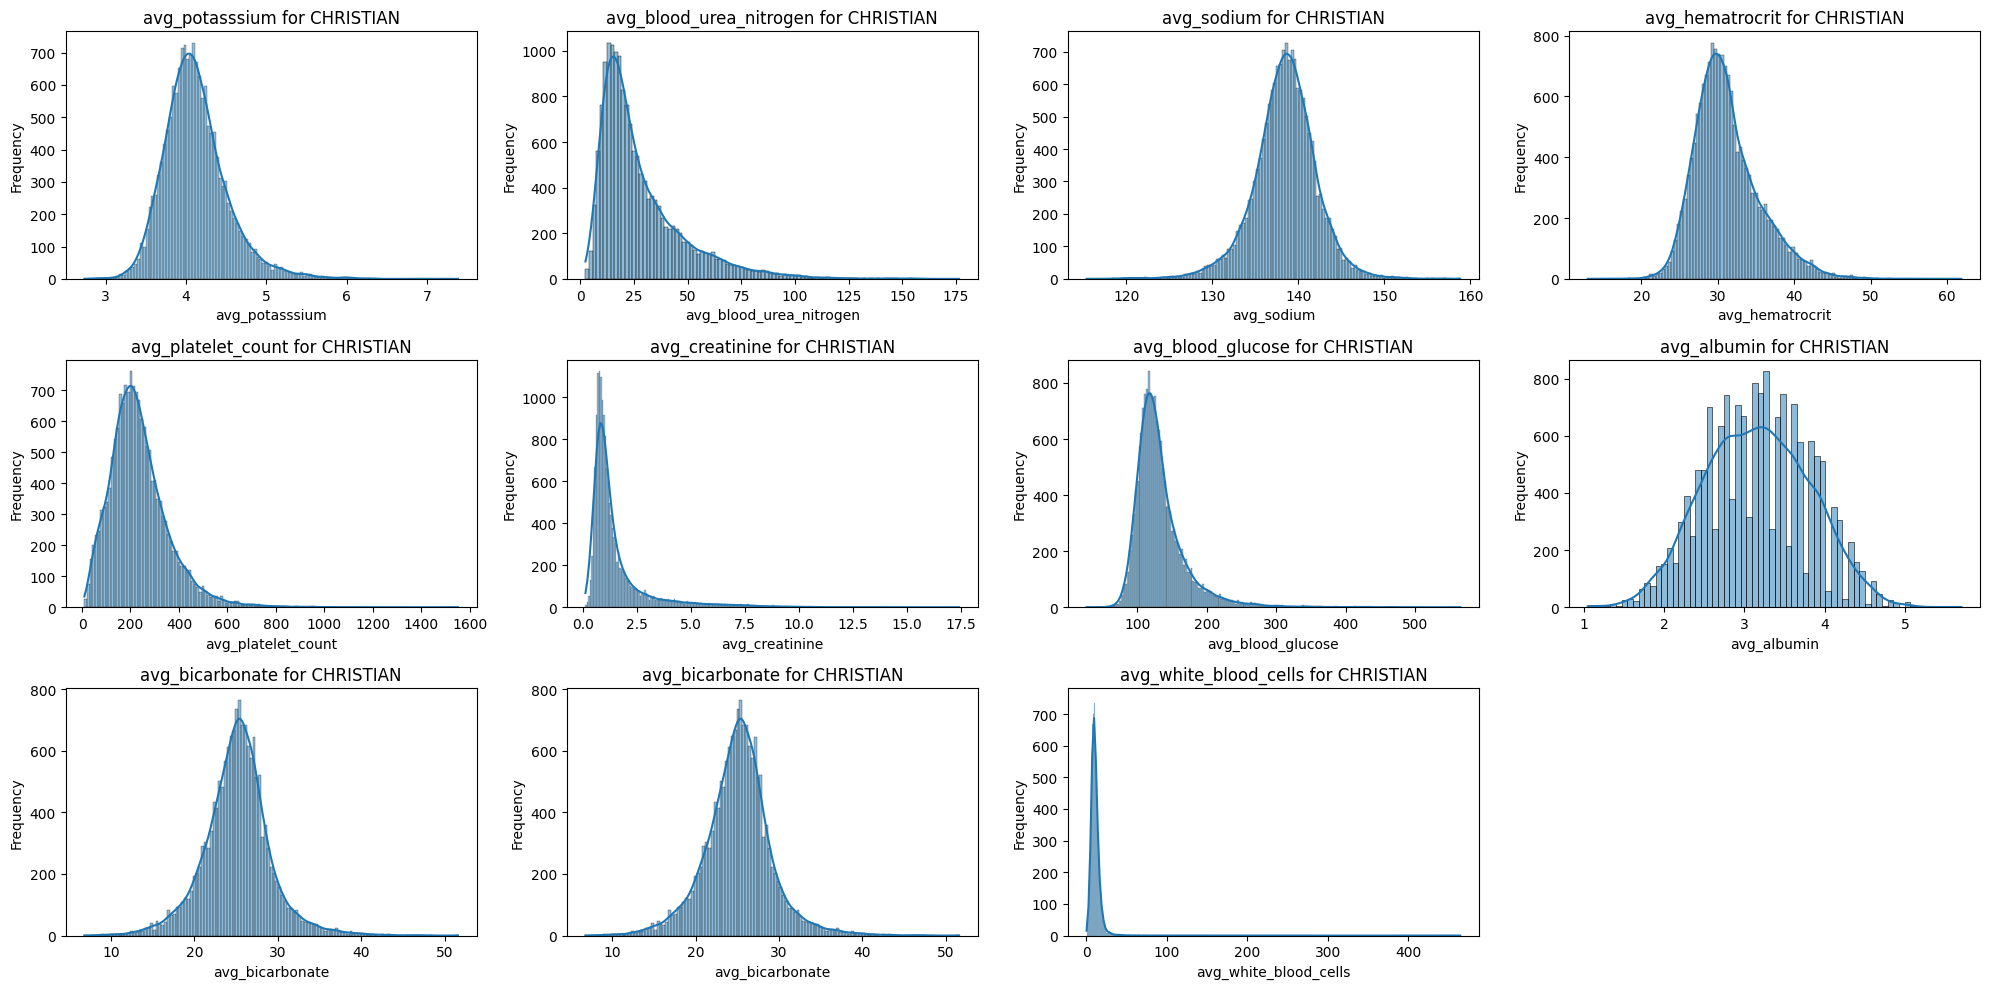

In [22]:
# Lab Tests Variables with CHRISTIAN
religion_df = df_last[df_last['religion'] == 'CHRISTIAN']
lab_tests = ['avg_potasssium', 'avg_blood_urea_nitrogen', 'avg_sodium',
             'avg_hematrocrit', 'avg_platelet_count', 'avg_creatinine',
             'avg_blood_glucose', 'avg_albumin', 'avg_bicarbonate',
             'avg_bicarbonate','avg_white_blood_cells']


plt.figure(figsize=(20, 10))
for i, test in enumerate(lab_tests):
    plt.subplot(3, 4, i + 1)
    sns.histplot(religion_df[test], kde=True)
    plt.title(f'{test} for CHRISTIAN')
    plt.xlabel(test)
    plt.ylabel('Frequency')
    plt.tight_layout()
plt.show()

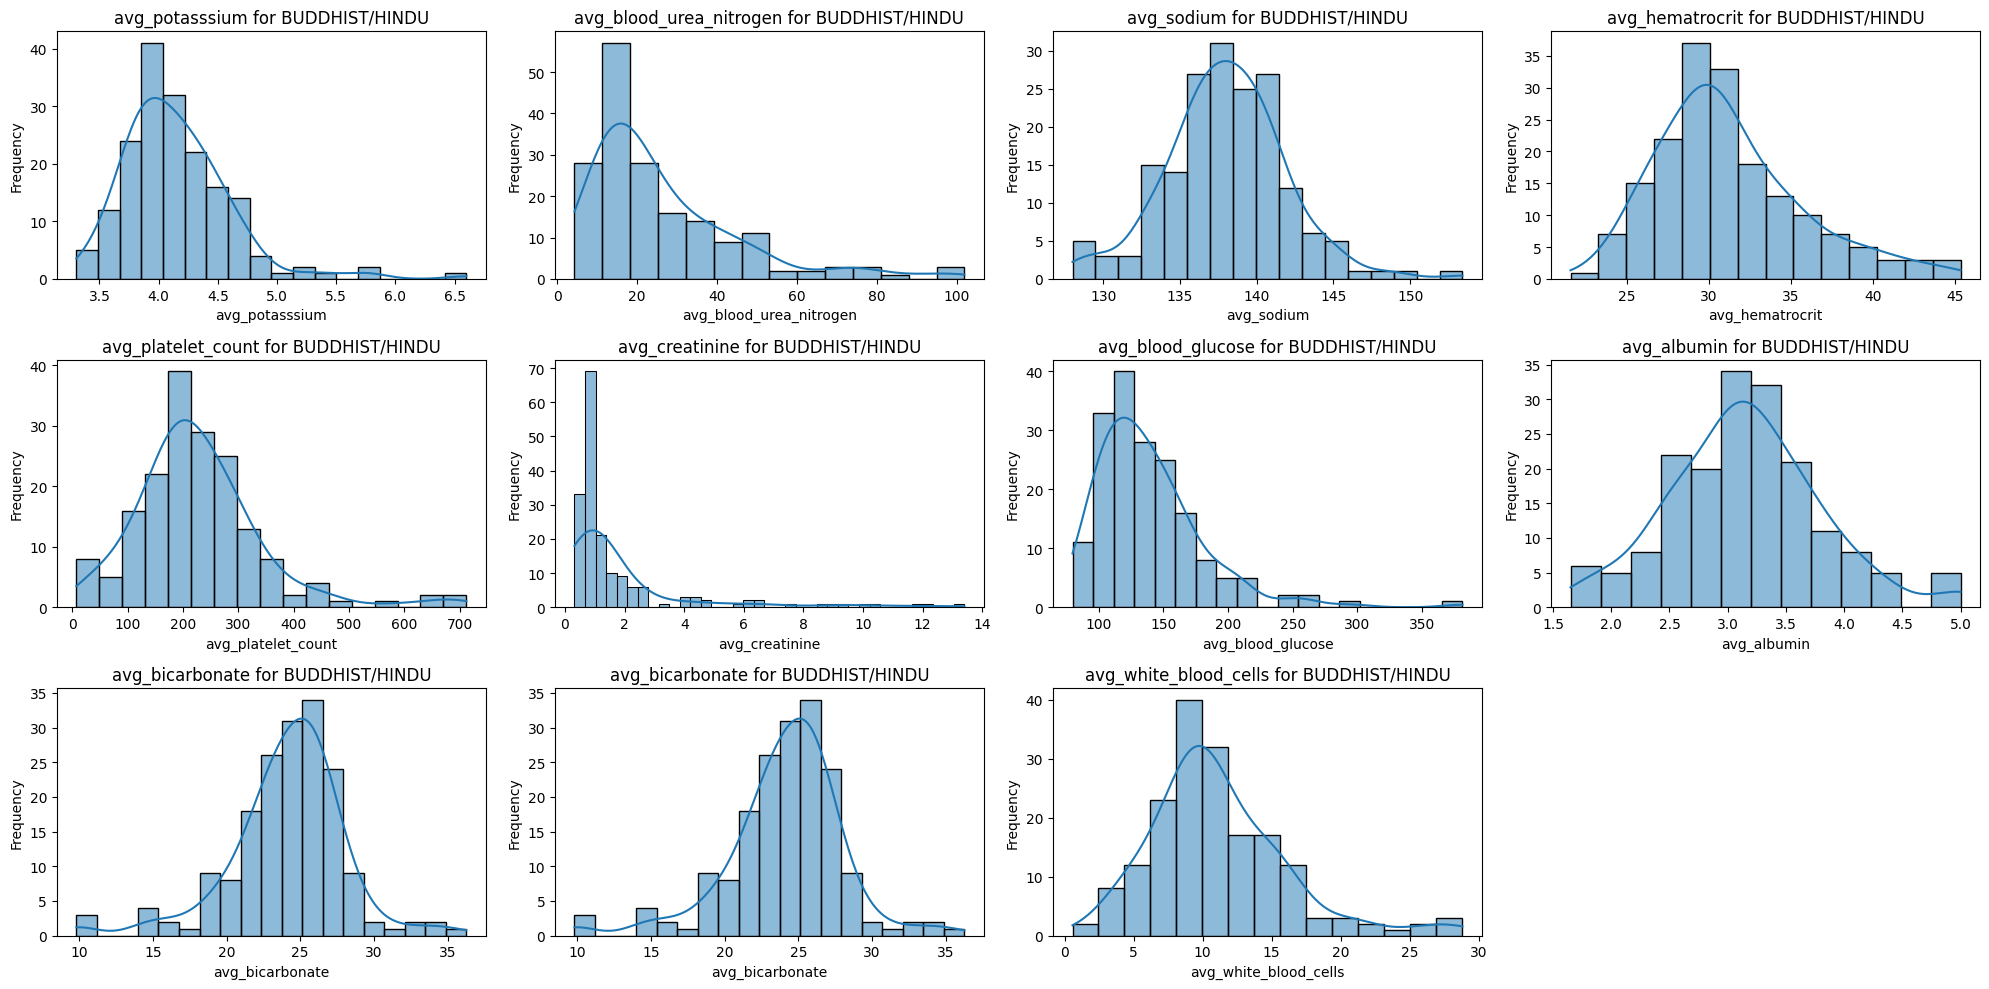

In [23]:
# Lab Tests Variables with BUDDHIST/HINDU
religion_df = df_last[df_last['religion'] == 'BUDDHIST/HINDU']
lab_tests = ['avg_potasssium', 'avg_blood_urea_nitrogen', 'avg_sodium',
             'avg_hematrocrit', 'avg_platelet_count', 'avg_creatinine',
             'avg_blood_glucose', 'avg_albumin', 'avg_bicarbonate',
             'avg_bicarbonate','avg_white_blood_cells']


plt.figure(figsize=(20, 10))
for i, test in enumerate(lab_tests):
    plt.subplot(3, 4, i + 1)
    sns.histplot(religion_df[test], kde=True)
    plt.title(f'{test} for BUDDHIST/HINDU')
    plt.xlabel(test)
    plt.ylabel('Frequency')
    plt.tight_layout()
plt.show()

In [24]:
cols = ['gender','marital_status','religion','ethnicity']
for col in cols:
  print(df_last[col].value_counts())

gender
M    17361
F    13239
Name: count, dtype: int64
marital_status
MARRIED               14298
SINGLE                 7911
WIDOWED                4336
DIVORCED/SEPARATED     2357
UNKNOWN                1698
Name: count, dtype: int64
religion
CHRISTIAN         16079
NONE              11075
JEWISH/HEBREW      2854
ORTHODOX            296
BUDDHIST/HINDU      177
MUSLIM              119
Name: count, dtype: int64
ethnicity
WHITE       21812
NONE         3159
BLACK        2979
HISPANIC     1077
OTHER         800
ASIAN         773
Name: count, dtype: int64


In [25]:
from sklearn.preprocessing import LabelEncoder

# Initializing LabelEncoder
labelencoder = LabelEncoder()
cols = ['gender','marital_status','religion','ethnicity']
for col in cols:
  df_last[col] = labelencoder.fit_transform(df_last[col])

print(df_last.head())

   hadm_id        age  gender  marital_status  religion  ethnicity  \
0   124321  75.306343       1               1         1          5   
1   129635  58.989281       1               1         4          5   
2   104557  91.400000       1               1         1          3   
3   128652  72.315006       1               1         1          5   
4   176176  82.449144       1               1         1          3   

   avg_blood_glucose  std_blood_glucose  avg_bicarbonate  std_bicarbonate  \
0         134.600000          15.833860        27.250000         1.669046   
1         209.555556         104.623266        24.333333         2.500000   
2         148.571429          39.432885        19.428571         1.133893   
3         128.214286          22.000624        25.083333         2.609714   
4         121.000000          19.646883        27.400000         1.516575   

   ...     avg_hr    std_hr  avg_sys_press  std_sys_press  avg_resp_rate  \
0  ...  76.694444  9.183275     122.1800

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numerical_cols = df_last.select_dtypes(include=['number']).columns
numerical_cols = numerical_cols.drop(['hadm_id','age']) # Exclude hadm_id and age
df_last[numerical_cols] = scaler.fit_transform(df_last[numerical_cols])

display(df_last.head())

,hadm_id,age,gender,marital_status,religion,ethnicity,avg_blood_glucose,std_blood_glucose,avg_bicarbonate,std_bicarbonate,...,avg_hr,std_hr,avg_sys_press,std_sys_press,avg_resp_rate,std_resp_rate,avg_dias_press,std_dias_press,avg_spo2,std_spo2
0,124321,75.306343,1.0,0.25,0.2,1.0,0.172042,0.020825,0.466009,0.087422,...,0.000743,0.000009,0.039129,0.001097,0.000599,0.000014,0.027422,0.001221,0.002027,0.000004
1,129635,58.989281,1.0,0.25,0.8,1.0,0.291889,0.137602,0.402047,0.130946,...,0.000740,0.000009,0.036851,0.001203,0.000648,0.000023,0.021381,0.000812,0.001991,0.000006
2,104557,91.400000,1.0,0.25,0.2,0.6,0.194381,0.051863,0.294486,0.059391,...,0.000757,0.000008,0.034844,0.000558,0.000796,0.000015,0.020251,0.000716,0.001938,0.000006
3,128652,72.315006,1.0,0.25,0.2,1.0,0.161832,0.028936,0.418494,0.136692,...,0.000531,0.000008,0.032715,0.000650,0.000265,0.000011,0.022947,0.000558,0.002021,0.000004
4,176176,82.449144,1.0,0.25,0.2,0.6,0.150297,0.025840,0.469298,0.079436,...,0.000623,0.000008,0.036830,0.000380,0.000578,0.000016,0.020728,0.000482,0.001972,0.000004


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans


X = df_last # Example: use all numerical features
X = X.drop(columns=['hadm_id'])

In [28]:
X.head()

,age,gender,marital_status,religion,ethnicity,avg_blood_glucose,std_blood_glucose,avg_bicarbonate,std_bicarbonate,avg_blood_urea_nitrogen,...,avg_hr,std_hr,avg_sys_press,std_sys_press,avg_resp_rate,std_resp_rate,avg_dias_press,std_dias_press,avg_spo2,std_spo2
0,75.306343,1.0,0.25,0.2,1.0,0.172042,0.020825,0.466009,0.087422,0.073515,...,0.000743,0.000009,0.039129,0.001097,0.000599,0.000014,0.027422,0.001221,0.002027,0.000004
1,58.989281,1.0,0.25,0.8,1.0,0.291889,0.137602,0.402047,0.130946,0.165357,...,0.000740,0.000009,0.036851,0.001203,0.000648,0.000023,0.021381,0.000812,0.001991,0.000006
2,91.400000,1.0,0.25,0.2,0.6,0.194381,0.051863,0.294486,0.059391,0.236663,...,0.000757,0.000008,0.034844,0.000558,0.000796,0.000015,0.020251,0.000716,0.001938,0.000006
3,72.315006,1.0,0.25,0.2,1.0,0.161832,0.028936,0.418494,0.136692,0.067191,...,0.000531,0.000008,0.032715,0.000650,0.000265,0.000011,0.022947,0.000558,0.002021,0.000004
4,82.449144,1.0,0.25,0.2,0.6,0.150297,0.025840,0.469298,0.079436,0.075358,...,0.000623,0.000008,0.036830,0.000380,0.000578,0.000016,0.020728,0.000482,0.001972,0.000004


In [29]:
display(X.shape)

(30600, 34)

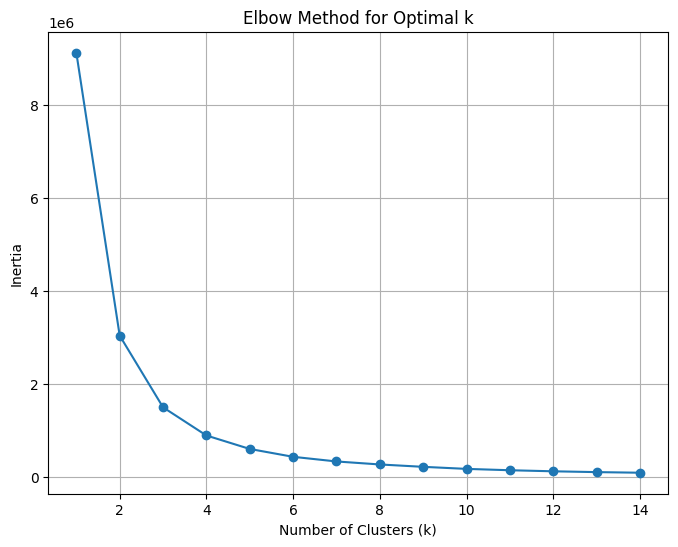

In [30]:
inertia = []
K_range = range(1, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method results
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5749657108338072
For n_clusters = 3 The average silhouette_score is : 0.5518972894378917
For n_clusters = 4 The average silhouette_score is : 0.5366739686366017
For n_clusters = 5 The average silhouette_score is : 0.5161754255328712


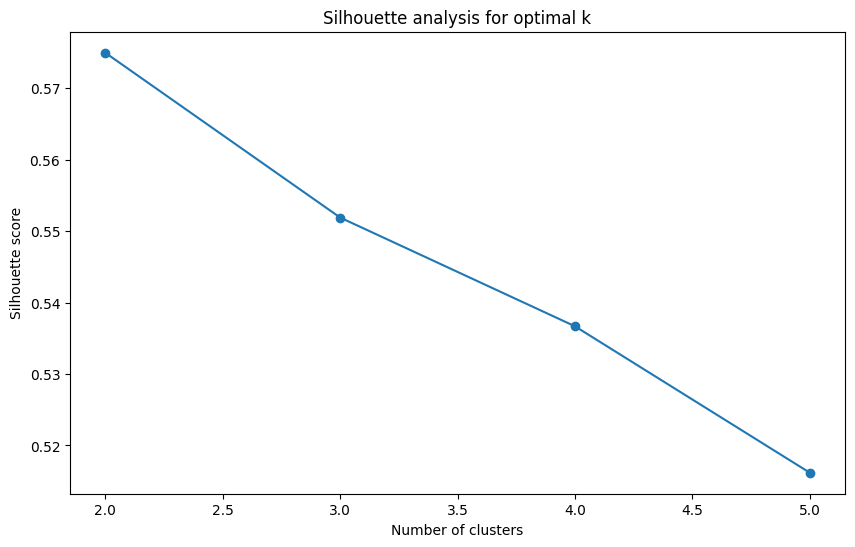

In [31]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2, 6))
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init = 10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)


plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.title("Silhouette analysis for optimal k")
plt.show()

In [32]:
# Initializing and training  the KMeans model
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
clusters = kmeans.fit_predict(X)

train_labels = kmeans.labels_

print(clusters[:10])

[0 1 0 0 0 0 0 0 0 0]


In [33]:
X["Cluster"] = clusters

In [34]:
# Calculating the silhouette score for the trained KMeans model
silhouette_avg = silhouette_score(X, train_labels)
print(f"Silhouette Score for k=2: {silhouette_avg}")

Silhouette Score for k=2: 0.5756624750735276


In [35]:
X.columns

Index(['age', 'gender', 'marital_status', 'religion', 'ethnicity',
       'avg_blood_glucose', 'std_blood_glucose', 'avg_bicarbonate',
       'std_bicarbonate', 'avg_blood_urea_nitrogen', 'std_blood_urea_nitrogen',
       'avg_sodium', 'std_sodium', 'avg_potasssium', 'std_potasssium',
       'avg_white_blood_cells', 'std_white_blood_cells', 'avg_creatinine',
       'std_creatinine', 'avg_albumin', 'avg_hematrocrit', 'std_hematrocrit',
       'avg_platelet_count', 'std_platelet_count', 'avg_hr', 'std_hr',
       'avg_sys_press', 'std_sys_press', 'avg_resp_rate', 'std_resp_rate',
       'avg_dias_press', 'std_dias_press', 'avg_spo2', 'std_spo2', 'Cluster'],
      dtype='object')

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


df_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
df_pca["Cluster"] = clusters

In [37]:
df_pca.head()

,PCA1,PCA2,Cluster
0,11.190726,0.484418,0
1,-5.145691,0.466056,1
2,27.279489,0.507791,0
3,8.200639,0.469835,0
4,18.330680,0.482827,0


In [38]:
loadings = pca.components_
loadings_df = pd.DataFrame(loadings.T, columns=['PCA1', 'PCA2'], index=X.columns)

# For PCA1:
top_pca1_features = loadings_df['PCA1'].abs().sort_values(ascending=False).head(10).index  # Top 10

   # For PCA2:
top_pca2_features = loadings_df['PCA2'].abs().sort_values(ascending=False).head(10).index  # Top 10

print("Top features for PCA1:", top_pca1_features)
print("Top features for PCA2:", top_pca2_features)

Top features for PCA1: Index(['age', 'Cluster', 'marital_status', 'gender', 'ethnicity', 'religion',
       'avg_blood_urea_nitrogen', 'avg_albumin', 'std_platelet_count',
       'std_hematrocrit'],
      dtype='object')
Top features for PCA2: Index(['gender', 'marital_status', 'ethnicity', 'religion',
       'avg_blood_urea_nitrogen', 'avg_potasssium', 'avg_hematrocrit',
       'avg_platelet_count', 'avg_albumin', 'std_bicarbonate'],
      dtype='object')


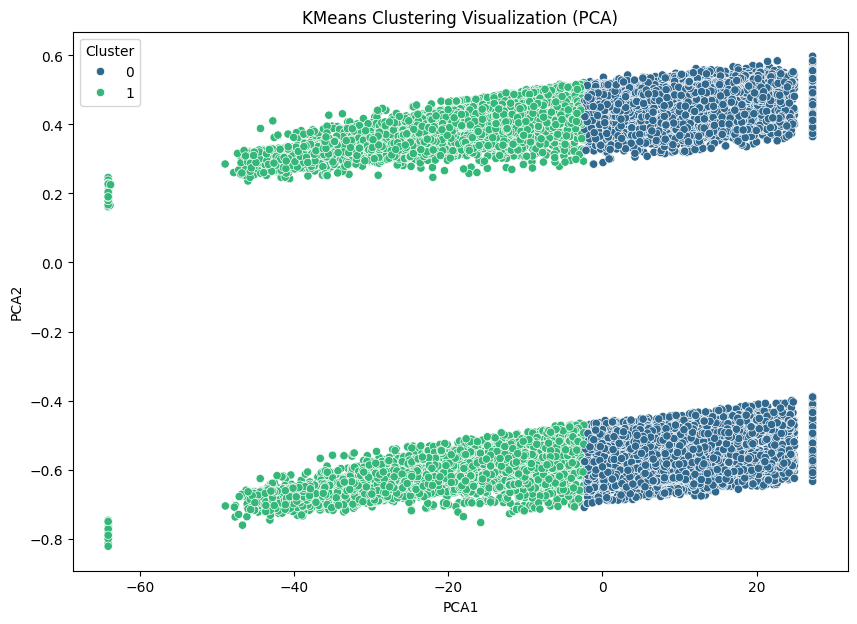

In [39]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df_pca, palette="viridis")
plt.title("KMeans Clustering Visualization (PCA)")
plt.show()

In [43]:
# Grouping by cluster and calculating mean values
cluster_summary = df_pca.groupby('Cluster').agg(['mean', 'median', 'std'])
display(cluster_summary)

PCA1                            PCA2                    
              mean     median        std      mean    median       std
Cluster                                                               
0        11.943815  11.797439   8.600276 -0.001277  0.387672  0.507037
1       -16.669724 -13.803198  11.542111  0.001782  0.343556  0.488605

In [41]:
# Compare means across clusters for key features
key_features = ['age',  'avg_sodium', 'avg_hematrocrit',  'avg_platelet_count', 'avg_white_blood_cells', 'gender', 'avg_potasssium',  'avg_blood_urea_nitrogen',  'avg_creatinine', 'avg_blood_glucose', 'avg_spo2',  'avg_resp_rate',  'avg_hr']
cluster_means = X.groupby('Cluster')[key_features].mean()
display(cluster_means)

,age,avg_sodium,avg_hematrocrit,avg_platelet_count,avg_white_blood_cells,gender,avg_potasssium,avg_blood_urea_nitrogen,avg_creatinine,avg_blood_glucose,avg_spo2,avg_resp_rate,avg_hr
Cluster,,,,,,,,,,,,,
0,76.058319,0.422604,0.329225,0.146542,0.024517,0.540080,0.298724,0.127689,0.056485,0.171554,0.002057,0.000744,0.000813
1,47.460705,0.414996,0.338084,0.151386,0.022416,0.605418,0.289373,0.093098,0.055581,0.167866,0.002016,0.000808,0.000944


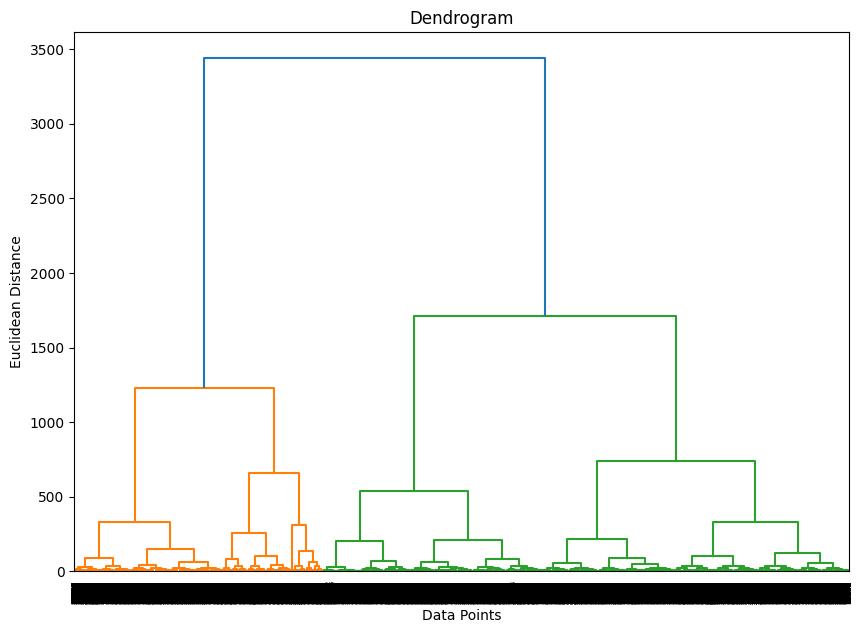

In [42]:
import scipy.cluster.hierarchy as sch

# Dendrogram Visualization
plt.figure(figsize=(10, 7))  # Adjust figure size as needed
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

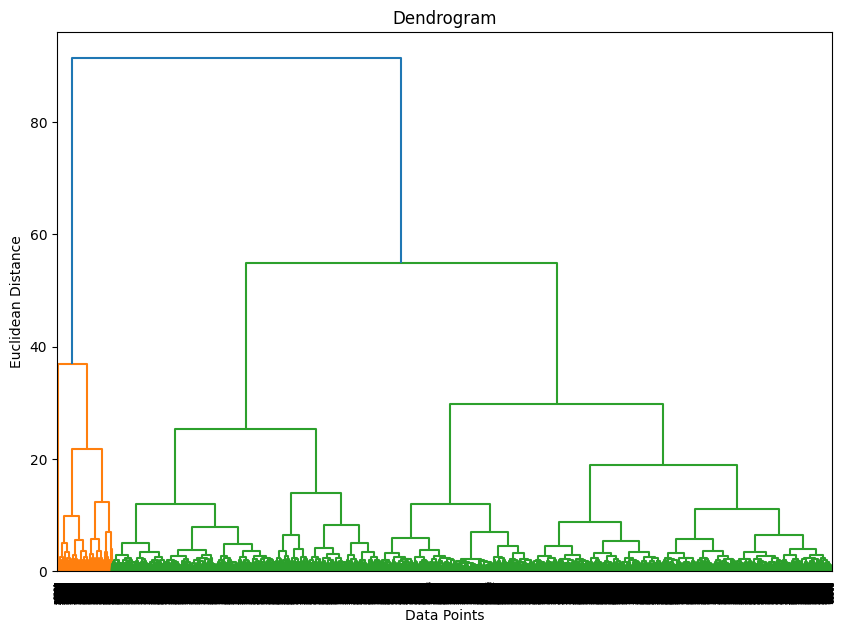

In [45]:
import matplotlib.pyplot as plt
# Dendrogram Visualization
plt.figure(figsize=(10, 7))  # Adjust figure size as needed
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

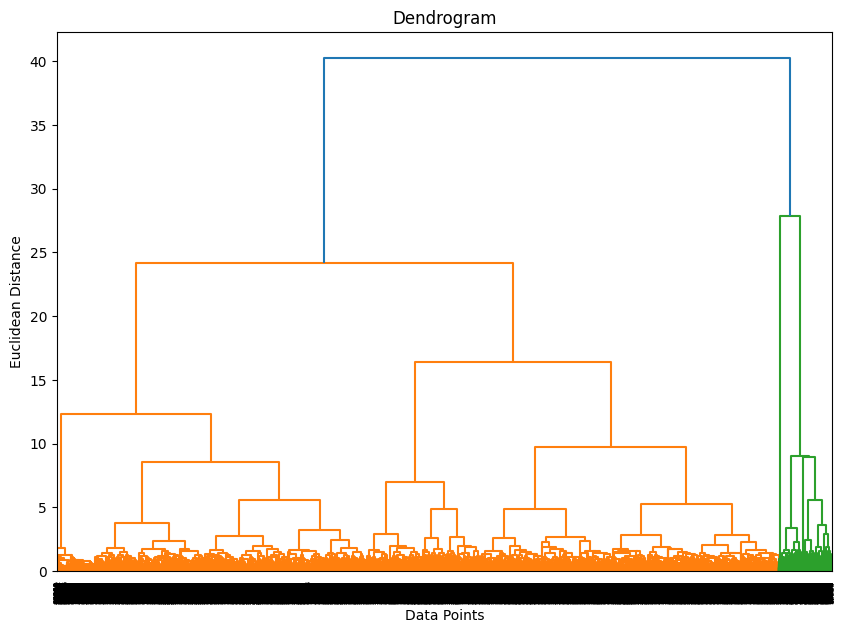

In [46]:
import matplotlib.pyplot as plt
# Dendrogram Visualization
plt.figure(figsize=(10, 7))  # Adjust figure size as needed
dendrogram = sch.dendrogram(sch.linkage(X, method='average'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [49]:
# Import necessary libraries
!pip install scikit-learn  # Install scikit-learn if you haven't already
from sklearn.cluster import AgglomerativeClustering # Import AgglomerativeClustering

linkage_methods = ['ward', 'complete', 'average']

# Hierarchical Clustering with different clusters
for n_clusters in range(2, 4):  # Try clusters from 2 to 5
    for linkage in linkage_methods:
        hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage) # Now you can use AgglomerativeClustering
        hierarchical_clustering.fit(X)
        labels = hierarchical_clustering.labels_

        # Evaluate clustering performance
        silhouette_avg = silhouette_score(X, labels)
        print(f"Silhouette score for {n_clusters} clusters, {linkage} linkage: {silhouette_avg}")

        # Visualize the clusters using PCA

Silhouette score for 2 clusters, ward linkage: 0.5664851725461255
Silhouette score for 2 clusters, complete linkage: 0.5277794589133834
Silhouette score for 2 clusters, average linkage: 0.5282969710852956
Silhouette score for 3 clusters, ward linkage: 0.5149851815283312
Silhouette score for 3 clusters, complete linkage: 0.5409157663606211
Silhouette score for 3 clusters, average linkage: 0.5097488964625422


Silhouette score for ward linkage: 0.5664851725461255


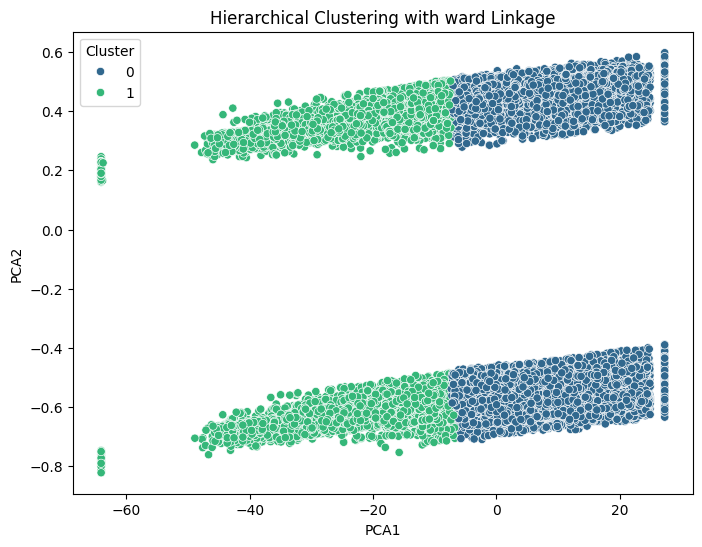

Silhouette score for complete linkage: 0.5277794589133834


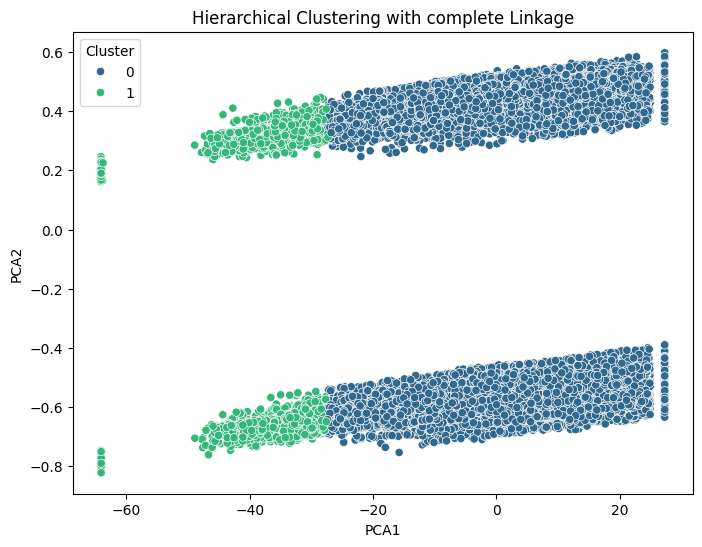

Silhouette score for average linkage: 0.5282969710852956


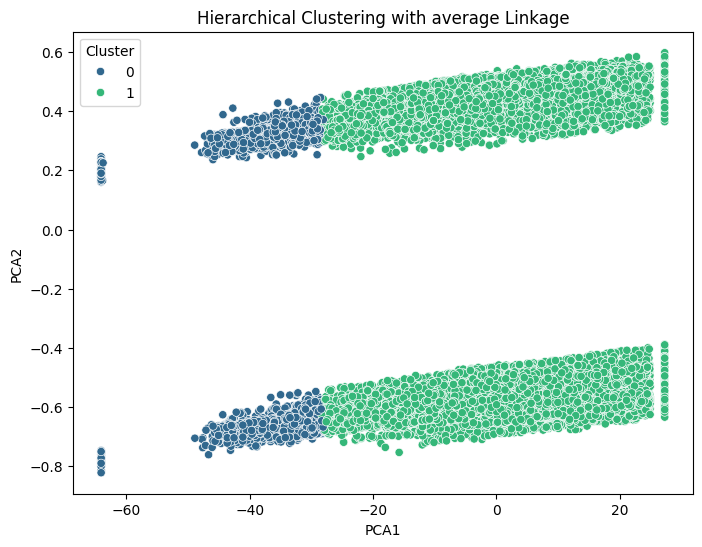

In [50]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering


# Hierarchical Clustering
linkage_methods = ['ward', 'complete', 'average']

for linkage in linkage_methods:
    # Remove 'affinity='euclidean'' for older scikit-learn versions
    # If using 'ward' linkage, 'affinity' defaults to 'euclidean'
    # For other linkages, you might need to specify a different metric
    # if 'euclidean' distance is not appropriate for your data.
    hierarchical_clustering = AgglomerativeClustering(n_clusters=2, linkage=linkage)
    hierarchical_clustering.fit(X)
    labels = hierarchical_clustering.labels_

    # Evaluate clustering performance
    silhouette_avg = silhouette_score(X, labels)
    print(f"Silhouette score for {linkage} linkage: {silhouette_avg}")


    # Visualize the clusters using PCA
    pca = PCA(n_components=2)
    X_ht_pca = pca.fit_transform(X)

    df_ht_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
    df_ht_pca['Cluster'] = labels

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_ht_pca, palette='viridis')
    plt.title(f'Hierarchical Clustering with {linkage} Linkage')
    plt.show()

In [56]:
hierarchical_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
hierarchical_clustering.fit(X)  # Changed 'heirachial' to 'X'
labels = hierarchical_clustering.labels_

X['Cluster'] = labels  # Changed 'heirachial' to 'X'

# Evaluate clustering performance
silhouette_avg = silhouette_score(X, labels)
print('Best Model')
print(f"Silhouette score for ward linkage: {silhouette_avg}")

Best Model
Silhouette score for ward linkage: 0.5672477052896181


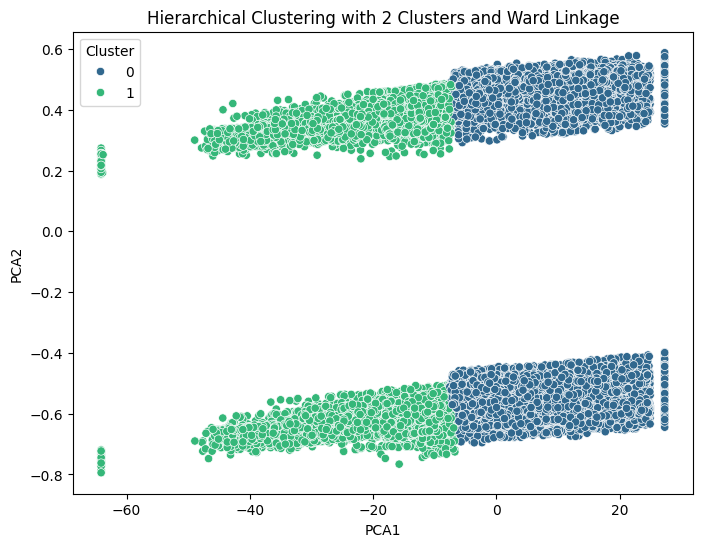

In [58]:
pca = PCA(n_components=2)
X_ht_pca = pca.fit_transform(X)

df_ht_pca = pd.DataFrame(X_ht_pca, columns=['PCA1', 'PCA2'])
df_ht_pca['Cluster'] = labels

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_ht_pca, palette='viridis')
plt.title(f'Hierarchical Clustering with 2 Clusters and Ward Linkage')
plt.show()

In [59]:
# Grouping by cluster and calculating mean values
cluster_summary = df_ht_pca.groupby('Cluster').agg(['mean', 'median', 'std'])
display(cluster_summary)

PCA1                            PCA2                    
              mean     median        std      mean    median       std
Cluster                                                               
0         9.554877   9.414205   9.894747  0.012813  0.397773  0.504419
1       -20.267567 -17.293046  10.831189 -0.027179  0.328244  0.488230

In [61]:
sns.barplot# Compare means across clusters for key features
key_features = ['age',  'avg_sodium', 'avg_hematrocrit',  'avg_platelet_count', 'avg_white_blood_cells', 'gender', 'avg_potasssium',  'avg_blood_urea_nitrogen',  'avg_creatinine', 'avg_blood_glucose', 'avg_spo2',  'avg_resp_rate',  'avg_hr']
cluster_means = X.groupby('Cluster')[key_features].mean()
display(cluster_means)

,age,avg_sodium,avg_hematrocrit,avg_platelet_count,avg_white_blood_cells,gender,avg_potasssium,avg_blood_urea_nitrogen,avg_creatinine,avg_blood_glucose,avg_spo2,avg_resp_rate,avg_hr
Cluster,,,,,,,,,,,,,
0,73.671241,0.421410,0.329738,0.146567,0.024188,0.553279,0.298390,0.124818,0.056510,0.171546,0.002049,0.000739,0.000817
1,43.863741,0.415225,0.339679,0.152800,0.022478,0.597205,0.287251,0.088712,0.055254,0.166766,0.002021,0.000838,0.000977
